### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
# импорт библиотеки pandas
import pandas as pd 

In [2]:
# чтение файла с данными и сохранение в data_movies
data_movies = pd.read_csv('mkrf_movies.csv') 
# чтение файла с данными и сохранение в data_shows
data_shows = pd.read_csv('mkrf_shows.csv') 
# получение информации о первой таблице
display(data_movies.info())
# получение информации о второй таблице
display(data_shows.info())
# выведем на экран таблицу №1
display(data_movies.head(3))
# выведем на экран таблицу №2
data_shows.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0
2,111000116,153030013.4


In [3]:
# получение информации о "выбивающихся" данных столбца для изменения значения
data_movies['puNumber'].sort_values(ascending=False).head()

1797          нет
5249    231001111
1011    231001012
3992    226019110
4355    226017410
Name: puNumber, dtype: object

In [4]:
# замена значения в строке 1797 на ноль
data_movies.loc[1797, 'puNumber'] = 0
# изменение типа данных в столбце, по которому будут объединяться таблицы
data_movies['puNumber'] = data_movies['puNumber'].astype('int')
# создание объединенной таблицы с данными
data = data_movies.merge(data_shows, on='puNumber', how='outer')
# вывод 15 строк снизу, полученной таблицы
data.tail(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7471,Реальная любовь в Нью-Йорке,121038219,2019-12-19T12:00:00.000Z,Художественный,"Креатив Энлэйнс, Арт, Копенгаген Филм, Дет Дан...",Дания - Канада - Швеция - Франция - Германия -...,Лоне Шерфиг,"Малене Бленков, Сандра Каннингэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,драма,3143790.50
7472,Черное Рождество,121038319,2019-12-19T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Блюмхауз Продакшнз, Дивид/К...",США - Новая Зеландия,Софи Такал,Джесси Хендерсон,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,3.9,"ужасы,триллер,детектив",18001772.43
7473,Ходячий замок,124010519,2019-12-19T12:00:00.000Z,Анимационный,"Студио Гибли, Буена Виста Хоум Интертейнмент, ...",Япония,Хаяо Миядзаки,"Томохико Исии, Хаяо Миядзаки, Тосио Судзуки",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.3,"аниме,мультфильм,фэнтези",NaN
7474,Вторжение,111022519,2019-12-23T12:00:00.000Z,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
7475,Папа,111022919,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",Россия,К.Чувикова,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.2,драма,NaN
7476,Я свободен,111023019,2019-12-26T12:00:00.000Z,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN
7477,Тридцать,121038419,2019-12-26T12:00:00.000Z,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,драма,NaN
7478,(Не)идеальный мужчина,111023119,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000000.0,60000000.0,150147502.0,Фонд кино,4.5,"комедия,фантастика,мелодрама",NaN
7479,Эколав,111023219,2019-12-26T12:00:00.000Z,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23T12:00:00.000Z,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.00


#### Вывод
Объединение провел по столбцу `puNumber` предварительно заменив некорректное значение на ноль.
А также приведя этот столбец к типу данных `int`.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [5]:
# получение информации о таблице
display(data.info())
# изменение типа данных для даты и возвращение "привычного" формата
data['show_start_date'] = pd.to_datetime(data['show_start_date'])
# замена пропущенных значение в столбце на ноль и изменение типа данных на int
data['refundable_support'] = data['refundable_support'].fillna(0)
data['refundable_support'] = data['refundable_support'].astype('int')
# замена пропущенных значение в столбце на ноль и изменение типа данных на int
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].astype('int')
# замена пропущенных значение в столбце на ноль и изменение типа данных на int
data['budget'] = data['budget'].fillna(0)
data['budget'] = data['budget'].astype('int')
# замена пропущенных значение в столбце на ноль и изменение типа данных на int
data['box_office'] = data['box_office'].fillna(0)
data['box_office'] = data['box_office'].astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

None

##### Вывод
На этом шаге исправлен тип данных для столбца `show_start_date` на привычный `datetime64`

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [6]:
# замена пропущенных значение в столбце с жанрами
data['genres'] = data['genres'].fillna('неизвестный')
# замена пропущенных значение в столбце с именами продюссеров
data['producer'] = data['producer'].fillna('Неизвестный')
# замена пропущенных значение в столбце с именами режиссеров
data['director'] = data['director'].fillna('Неизвестный')
# замена пропущенных значение в столбце с информацией о источнике финансовой поддержки
data['financing_source'] = data['financing_source'].fillna('Неизвестный')
# просмотр уникальных значений в столбце с рейтингом
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [7]:
# создание функции для изменения "выбивающихся" значений
def percent_move(value):
    if type(value) == float:
        return value
    if type(value) == str and value[-1] == '%': 
        value = float(value[0:len(value)-1])
        value /= 10
    return value
# применение функции для замены выбивающихся значений
data['ratings'] = data['ratings'].apply(percent_move)
# расчет медианного значения рейтинга
ratings_median = (data.dropna(subset=['ratings']))['ratings'].median()
# изменение типа данных на строку для устранения различий
data['ratings'] = data['ratings'].astype('str')
# изменение типа данных на числовое для приведения всех данных в единый формат
data['ratings'] = data['ratings'].astype('float')
# заполнение пропусков медианным значением
data['ratings'] = data['ratings'].fillna(ratings_median)
# получение уникальных значений столбца с рейтингом для проверки
display(data['ratings'].unique())
# получение общих данных о таблице и типе данных
data.info()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 8.2, 7.5, 6.7, 7.9, 5.9, 6.2,
       5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4, 9.9,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7, 3.5,
       3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9, 1. ,
       8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     7486 non-null   int32              
 10  nonrefundable_support  7486 non-null   int32              
 11  budget                 7486 non-null   int32            

##### Вывод
В столбцах `director` и `producer` пропуски заменены на на `Неизвестный` так как это похоже на баг в данных и для полного заполнения значений потребуется либо ручное вмешательство в каждую строку либо корректировка изначальной таблицы с данными.

Для столбца с пропусками в жанрах проведена аналогичная замена.

Данные в столбце с рейтингами были подвернуты промежуточной обьработке с отбрасыванием `%` и приведения значения к десятичному. А пропуски заменены медианным значениями, так как если заменять средним значением то можем внести искажения в данные и получим несоответсвующие реальности значения поскольку фильмов с крайне низким и крайне высоким рейтингом мало.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [8]:
# проверка на явные дубликаты
display(data['title'].duplicated().sum())
# вывод первых пяти строк с дублирующими значениями и их количеством
display(data['title'].value_counts().head(5))

# создание копии таблицы, если потребуется, чтобы вернуся к этому этапу
# data_filtered = data.copy()
# удаление дубликатов в столбце с названием фильма и перезаписыванием индексов в новой таблице
# data_filtered['title'] = data_filtered['title'].drop_duplicates().reset_index(drop=True)
# перезаписывание таблциы без дубликатов в названии фильма
# data_filtered = data_filtered.dropna(subset=['title'])
# проверка на явные дубликаты после проделанных шагов
# display(data_filtered['title'].duplicated().sum())
# получение информации о размерах таблиц: с дубликатами и отфильтрованной

display(data.shape)
# data_filtered.shape

714

День святого Валентина_                                        5
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/    4
Красавчик-2                                                    4
Дитя тьмы                                                      4
Безумцы                                                        4
Name: title, dtype: int64

(7486, 16)

In [9]:
# рассчитаем количество оставшихся данных после удаления дубликатов
# percent_saved_data = 6772 / 7486 * 100
# выведем значение на экран
# round(percent_saved_data, 2)

# выведем уникальные значения фильмов
list(data['title'].unique())

['Открытый простор',
 'Особо важное задание',
 'Особо опасен',
 'Остановился поезд',
 'Любовь и голуби',
 'Любовь и сигареты',
 'Отпетые мошенники.',
 'Отпуск за свой счет',
 'Превосходство Борна /По одноименной новелле Роберта Ладлэма/',
 'Ответный ход',
 'Малышка на миллион /По мотивам рассказов Ф.Х.Тула из сборника "Клейма от канатов"/',
 'Преданный садовник',
 'Отель /По мотивам пьесы Джона Уэбстера/',
 'Председатель',
 'Осенний марафон',
 'Осень',
 'Неподдающиеся',
 'Неподсуден',
 'Незабываемый 1919-й год',
 'Незаконченная жизнь',
 'Операция "Ы" и другие приключения Шурика',
 'Неизвестные страницы из жизни разведчика',
 'Неисправимый лгун',
 'Призрак замка Моррисвиль',
 'Оружейный барон',
 'Отставной козы барабанщик',
 'Паршивая овца',
 'Плюмбум, или Опасная игра',
 'Первое свидание',
 'Охота на лис.',
 'Пиноккио 3000',
 'Перелом',
 'Мисс Поттер',
 'Миссис Хендерсон представляет',
 'Планета КА-ПЭКС /По мотивам романа Джин Бруэр/',
 'Молчи в тряпочку',
 'Мужики!..',
 'Автомобиль, с

##### Вывод
На данном шаге нашел дубликаты в названиях фильмов, это связано с тем что на одну картину могло быть выдано несколько прокатных удостоверенеий. Однако при удалении дубликатов теряется значительная часть данных о фильмах с государственной поддержкой (более 10%), хотя вся таблица теряет 9,5%. Поэтому на данном шаге оставил все без изменений.

При рассмотрении списка уникальных названий картин, неявных дублей не выявлено. Попадались значения с полностью одинаковым названием фильмов, но отличались лишь приставкой `3D`, а так как это разные кассовые сборы присвоенные уникальным значениям прокатных удостоверений, то правильно будет оставить данные на этом шаге без изменений.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [10]:
# получение данных из столбца с имененм режиссера
data['director']

0           Кевин Костнер
1               Е.Матвеев
2       Тимур Бекмамбетов
3       Тимур Бекмамбетов
4       Тимур Бекмамбетов
              ...        
7481          Фил Грабски
7482           Ник Пауэлл
7483     Чарльз Е.Бастьен
7484             А.Беляев
7485             И.Трусов
Name: director, Length: 7486, dtype: object

In [11]:
# применение метода str.strip
data['title'].str.strip()
data['type'].str.strip()
data['director'].str.strip()
data['producer'].str.strip()
data['genres'].str.strip()
data['financing_source'].str.strip()
data['film_studio'].str.strip()
data['production_country'].str.strip()
data['age_restriction'].str.strip()
# получение первых трех строк
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,Неизвестный,7.2,"боевик,драма,мелодрама",0
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестный,«6+» - для детей старше 6 лет,0,0,0,Неизвестный,6.6,"драма,военный",0
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,Неизвестный,6.8,"фантастика,боевик,триллер",0


##### Вывод
Почти во всех столбцах были обнаружены лишние пробелы как перед значениями так и после, поэтому применив метод `str.strip()` данные были очищены от пробелов.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [12]:
# получим срез данных для нулевых значений бюджета
display(data.query('budget == 0 and refundable_support > 0 and nonrefundable_support > 0').sort_values(by='budget', ascending=False).head(3))
# получим столбец включающий возвратные и невозвратные средства
data['budget_cor'] = data['refundable_support'] + data['nonrefundable_support']
# применим к столбцу с данными о бюджете картин функцию для замены нулевых значений
data['budget'] = data.apply(lambda x: x['budget'] if x['budget'] > 0 else x['budget_cor'], axis=1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000,70000000,0,Фонд кино,7.8,"боевик,драма,криминал",196572438
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000,100000000,0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000,51000000,0,Фонд кино,6.3,"комедия,мелодрама",70299052


In [13]:
# получим еще раз срез данных для нулевых значений бюджета для проверки работы функции
data.query('budget == 0 and refundable_support > 0 and nonrefundable_support > 0').sort_values(by='budget', ascending=False).head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_cor


In [14]:
# получим срез данных для значений бюджета меньше значений гос.поддержки
data.query('budget < budget_cor').sort_values(by='budget', ascending=False).head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_cor


##### Вывод
В данных о государственной поддержке фильмов были обнаружены странные значения: нулевой бюджет. Это противоречит исходным данным, если есть гос.поддержка картины, то она должна быть учтена в графе бюджет т.е. включает как возвратные средства так и не возвратные. Поэтому нулевые значения с толбце `budget` были заменены на соответствующую сумму значений гос.поддрежки фильма. 

Картин с выбивающимися значениями, при условии, что сумма выделенных финансовых средств для гос.поддержки картин превышает бюджет фильмов не обнаружено.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [15]:
# получение столбца с годом премьеры
data['show_start_year'] = data['show_start_date'].dt.year
# вывод на экран первых трех строк
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_cor,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,Неизвестный,7.2,"боевик,драма,мелодрама",0,0,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестный,«6+» - для детей старше 6 лет,0,0,0,Неизвестный,6.6,"драма,военный",0,0,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,Неизвестный,6.8,"фантастика,боевик,триллер",0,0,2016


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [16]:
# создание собственной функции и ее применение к столбцу для определения главного жанра и главного режиссера
def func_main(value):
    values = value.split(',')
    return values[0]
data['main_genre'] = data['genres'].apply(func_main)
data['main_director'] = data['director'].apply(func_main)
# вывод на экран первых строк таблицы
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_cor,show_start_year,main_genre,main_director
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,Неизвестный,7.2,"боевик,драма,мелодрама",0,0,2015,боевик,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестный,«6+» - для детей старше 6 лет,0,0,0,Неизвестный,6.6,"драма,военный",0,0,2016,драма,Е.Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,Неизвестный,6.8,"фантастика,боевик,триллер",0,0,2016,фантастика,Тимур Бекмамбетов


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [17]:
# посчитаем соотношения бюджета фильма ко всем выделенным средствам
koef = (data['nonrefundable_support'].sum() + data['refundable_support'].sum()) / data['budget'].sum()
# выведем на экран округлив до двух знаков
round(koef, 2)

0.49

##### Вывод
Для вывода значений главного жанра и главного режиссера картины, была применена функция разделяющая строку на элементы с разделителем в виде `,` и возвращением первого элемента.

По полученным данным о фильмах с гос.поддержкой можно заметить что соотношение общего бюджета фильма ко всем выделенным средствам составляет в среднем 46%, или окло половины всех средств.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

0.42

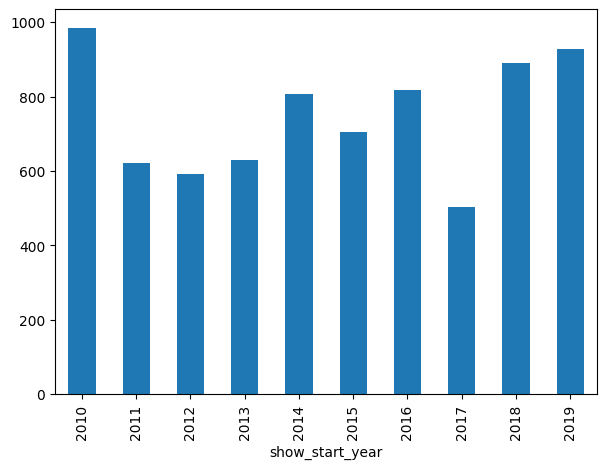

In [18]:
# получим срез данных с ненулевым значением кассовых сборов
data_box = data.query('box_office >= 0')
# получим сводную таблицу с количеством выходивших картин по годам и построим столбчатую диаграмму
data_box_count_pivot = data_box.pivot_table(index='show_start_year', values='box_office', aggfunc='count')
data_box_count_pivot.plot(xlabel='show_start_year', kind='bar', figsize=(7,5), legend=False)
# рассчитаем долю фильмов с указанной информацией о прокате
div = 3158 / 7486
round(div, 2)

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

<AxesSubplot:xlabel='show_start_year'>

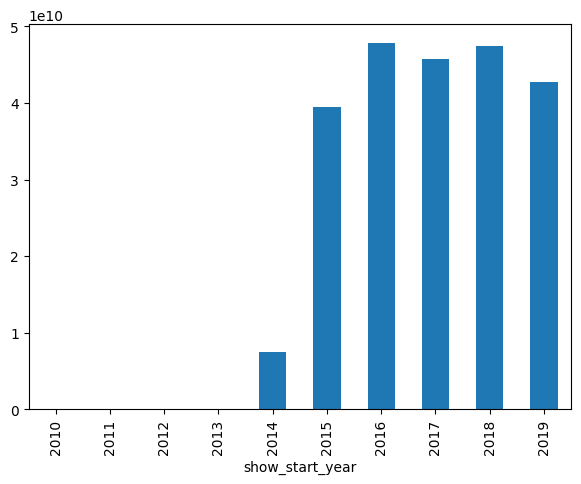

In [19]:
# получим сводную таблицу с суммой кассовых сборов картин по годам и построим столбчатую диаграмму
data_box_sum_pivot = data_box.pivot_table(index='show_start_year', values='box_office', aggfunc='sum')
data_box_sum_pivot.plot(xlabel='show_start_year', kind='bar', figsize=(7,5), legend=False)

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [20]:
# получим сводную таблицу с медианным и средним значением кассовых сборов картин по годам и заменим названия столбцов
data_box_mm_pivot = data_box.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median'])
data_box_mm_pivot.columns = ['mean_box_office', 'median_box_office']
# вывод таблицы на экран со средним и медианным значением по годам
data_box_mm_pivot

,mean_box_office,median_box_office
show_start_year,,
2010,2.465639e+03,0.0
2011,2.267326e+04,0.0
2012,1.172921e+04,0.0
2013,4.730112e+04,0.0
2014,9.225467e+06,0.0
2015,5.602463e+07,739938.0
2016,5.851626e+07,479832.5
2017,9.084131e+07,2487661.5
2018,5.325466e+07,288529.5


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

<AxesSubplot:xlabel='age_restrictionr'>

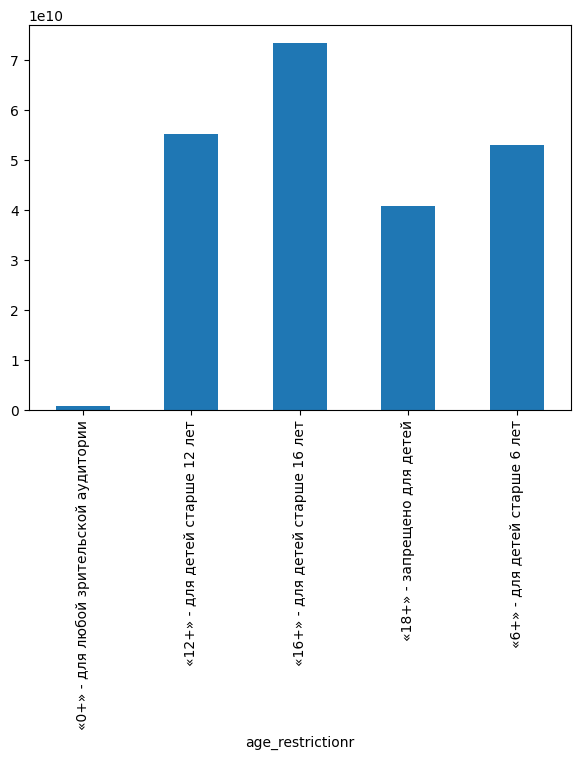

In [21]:
# получим срез данных с ненулевым значением кассовых сборов в период с 2015 по 2019 год
data_box_two = data.query('box_office >= 0 and 2015 <= show_start_year <= 2019')
# получим сводную таблицу по возрастным ограничениям и рассчитаем сумму кассовых сборов с построением графика
data_box_two_pivot = data_box_two.pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
data_box_two_pivot.plot(xlabel='age_restrictionr', kind='bar', figsize=(7,5), legend=False)

<AxesSubplot:xlabel='age_restrictionr'>

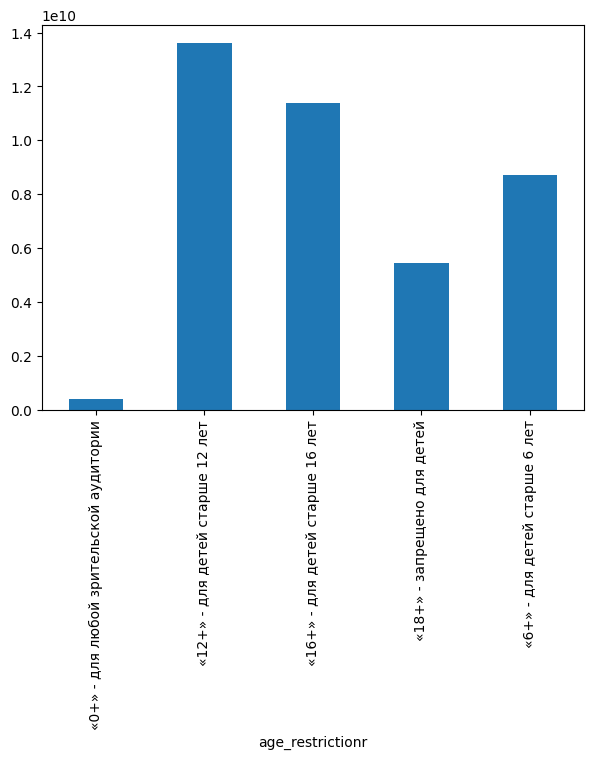

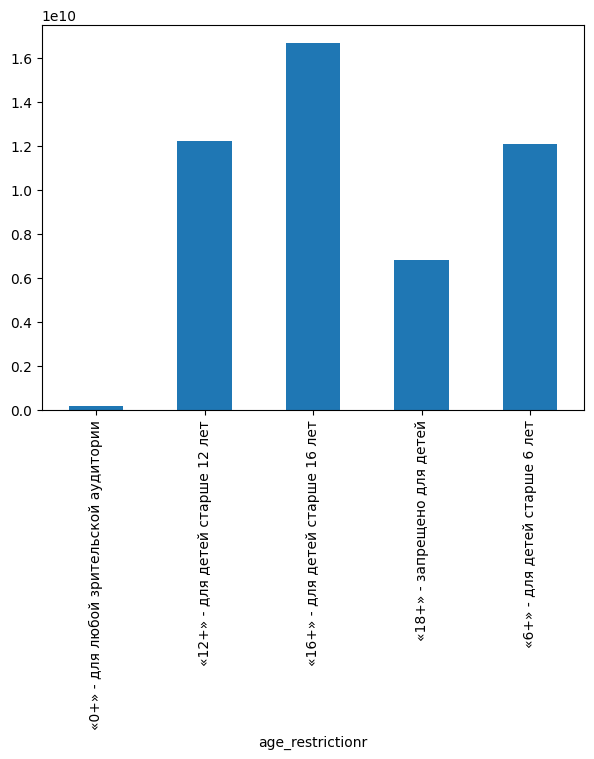

In [22]:
# получим срез данных с ненулевым значением кассовых сборов в 2015 году
data_box_two_2015 = data.query('box_office >= 0 and show_start_year == 2015')
# получим сводную таблицу по возрастным ограничениям и рассчитаем сумму кассовых сборов с построением графика
data_box_two_2015_pivot = data_box_two_2015.pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
data_box_two_2015_pivot.plot(xlabel='age_restrictionr', kind='bar', figsize=(7,5), legend=False)
# получим срез данных с ненулевым значением кассовых сборов в 2016 году
data_box_two_2016 = data.query('box_office >= 0 and show_start_year == 2016')
# получим сводную таблицу по возрастным ограничениям и рассчитаем сумму кассовых сборов с построением графика
data_box_two_2016_pivot = data_box_two_2016.pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
data_box_two_2016_pivot.plot(xlabel='age_restrictionr', kind='bar', figsize=(7,5), legend=False)

<AxesSubplot:xlabel='age_restrictionr'>

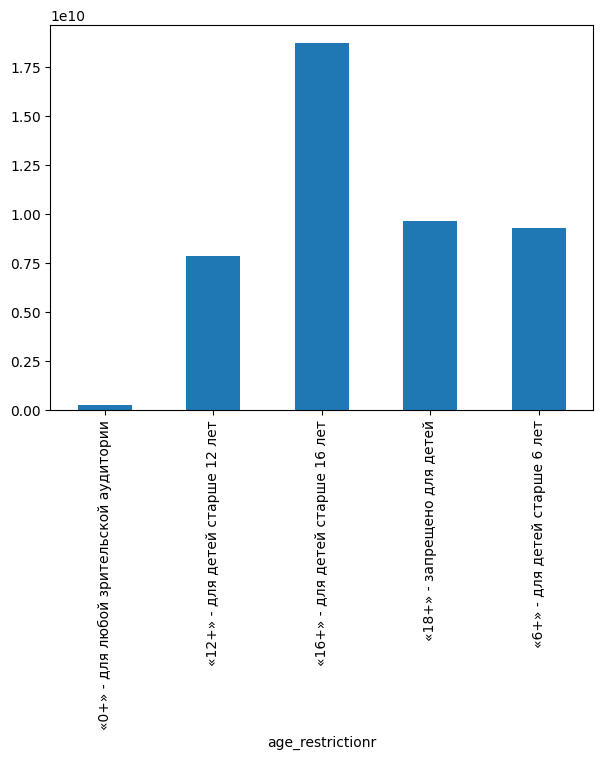

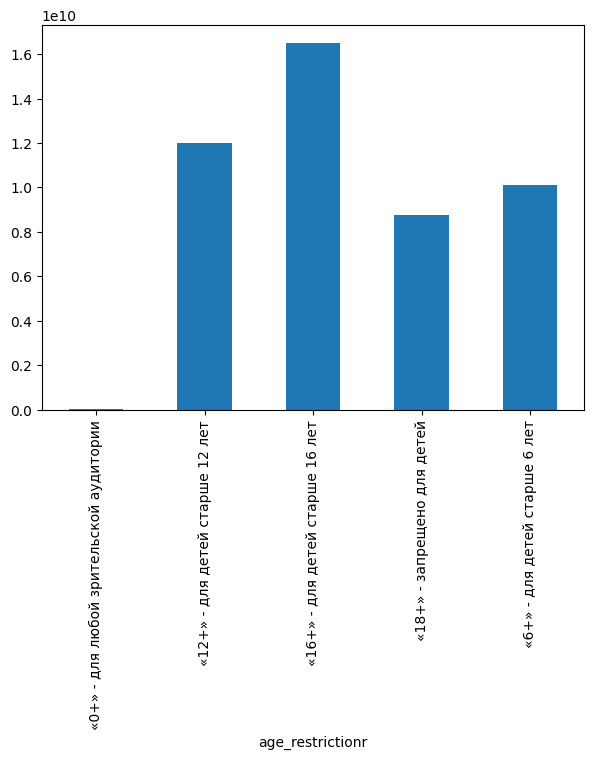

In [23]:
# получим срез данных с ненулевым значением кассовых сборов в 2017 году
data_box_two_2017 = data.query('box_office >= 0 and show_start_year == 2017')
# получим сводную таблицу по возрастным ограничениям и рассчитаем сумму кассовых сборов с построением графика
data_box_two_2017_pivot = data_box_two_2017.pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
data_box_two_2017_pivot.plot(xlabel='age_restrictionr', kind='bar', figsize=(7,5), legend=False)
# получим срез данных с ненулевым значением кассовых сборов в 2018 году
data_box_two_2018 = data.query('box_office >= 0 and show_start_year == 2018')
# получим сводную таблицу по возрастным ограничениям и рассчитаем сумму кассовых сборов с построением графика
data_box_two_2018_pivot = data_box_two_2018.pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
data_box_two_2018_pivot.plot(xlabel='age_restrictionr', kind='bar', figsize=(7,5), legend=False)

<AxesSubplot:xlabel='age_restrictionr'>

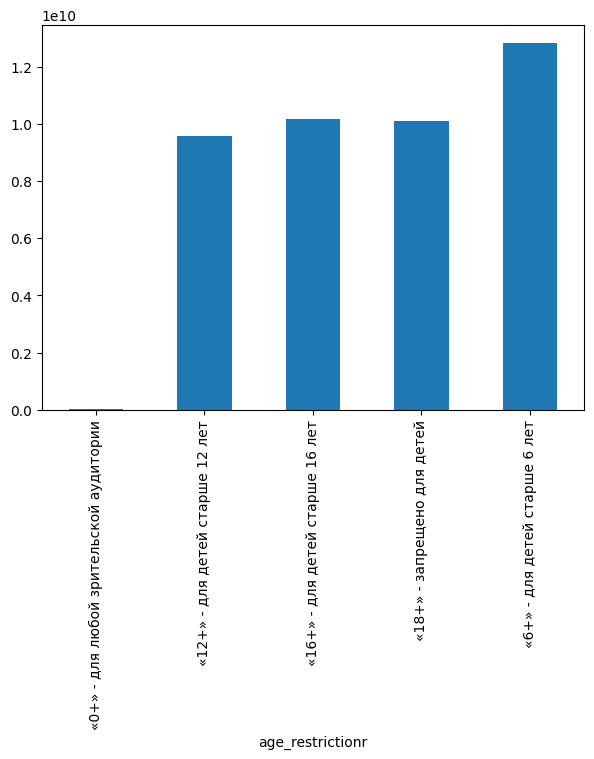

In [24]:
# получим срез данных с ненулевым значением кассовых сборов в 2019 году
data_box_two_2019 = data.query('box_office >= 0 and show_start_year == 2019')
# получим сводную таблицу по возрастным ограничениям и рассчитаем сумму кассовых сборов с построением графика
data_box_two_2019_pivot = data_box_two_2019.pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
data_box_two_2019_pivot.plot(xlabel='age_restrictionr', kind='bar', figsize=(7,5), legend=False)

##### Вывод
1. С 2010 года по 2016 год выходило с каждым годом все больше фильмов. Так в 2010 вышло только 100 картин тогда как к 2016 вышло уже 500 картин. В 2017 году наблюдается спад до 350 картин и возвращение к уровню 2017 года произошло в 2019 году.
2. В полученных данных известна информация о прокате только для 42% фильмов.
3. Наименьшая сумма сборов была в 2010 году, наибольшая сумма сборов в 2018 году.
4. Возрастная категория напрямую влияет на сборы с 2015 по 2019 год. Наиболее кассовой категорией является "16+", а также немного ниже расположены показатели для категорий "12+" и "6+", в то время как категория с самыми маленькими сборами "0+"
5. С 2015 по 2019 категория "16+" является всегда самой кассовой. Категория "12+" в 2015 и в 2019 являлась самой кассовой. Категория "18+" и "6+" не имеют сильных отличий и являются своего рода `золотой серединой`. А категория "0+" на всем промежутке времени с 2015 по 2019 год показывает наихудшие сборы.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

#### Вопрос 1
Есть ли зависимость от года проката, рейтинга, кассовых сборов и бюджета для фильмов с государственной поддержкой.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     7486 non-null   int32              
 10  nonrefundable_support  7486 non-null   int32              
 11  budget                 7486 non-null   int64            

<AxesSubplot:xlabel='ratings'>

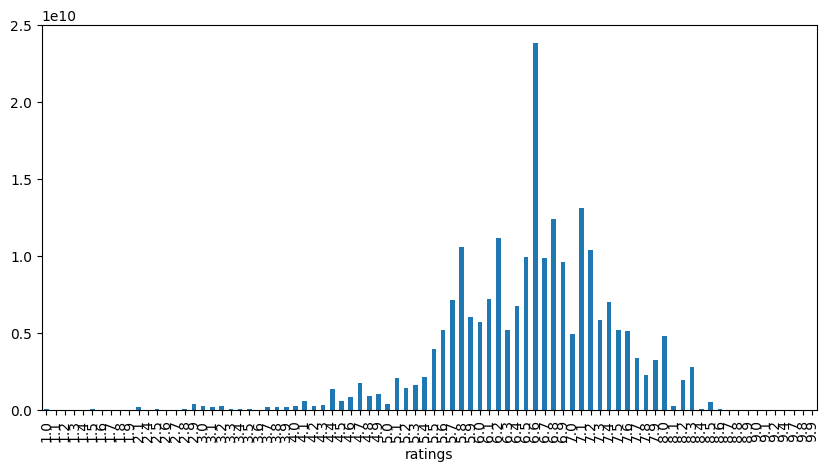

In [25]:
# получим срез данных по фильмам с гос.поддержкой
data_gov = data.query('refundable_support >= 0 and nonrefundable_support >= 0 and budget >= 0')
# получим информацию о таблице
data_gov.info()
# создадим сводную таблицу зависимости рейтинга от кассовых сборов и построим график
data_gov_one = data_gov.pivot_table(index='ratings', values='box_office', aggfunc='sum')
data_gov_one.plot(xlabel='ratings', kind='bar', figsize=(10,5), legend=False)

<AxesSubplot:xlabel='show_start_year'>

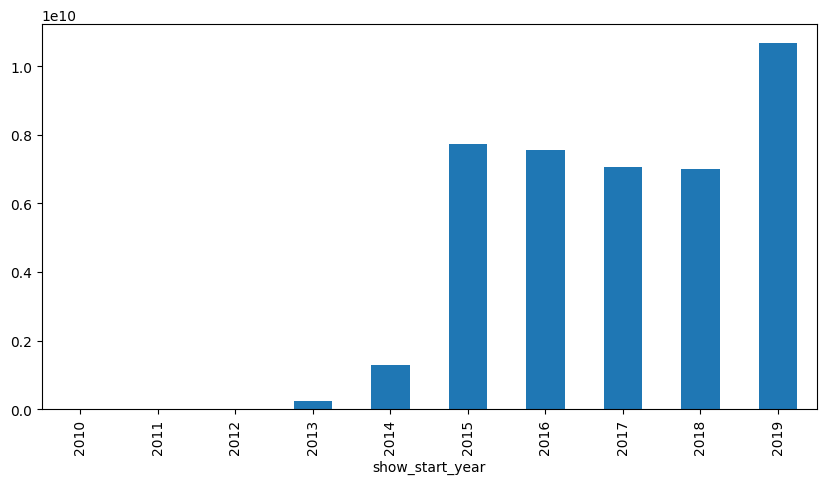

In [26]:
# создадим сводную таблицу зависимости года проката от бюджета картины и построим график 
data_gov_two = data_gov.pivot_table(index='show_start_year', values='budget', aggfunc='sum')
data_gov_two.plot(xlabel='show_start_year', kind='bar', figsize=(10,5), legend=False)

<AxesSubplot:xlabel='ratings'>

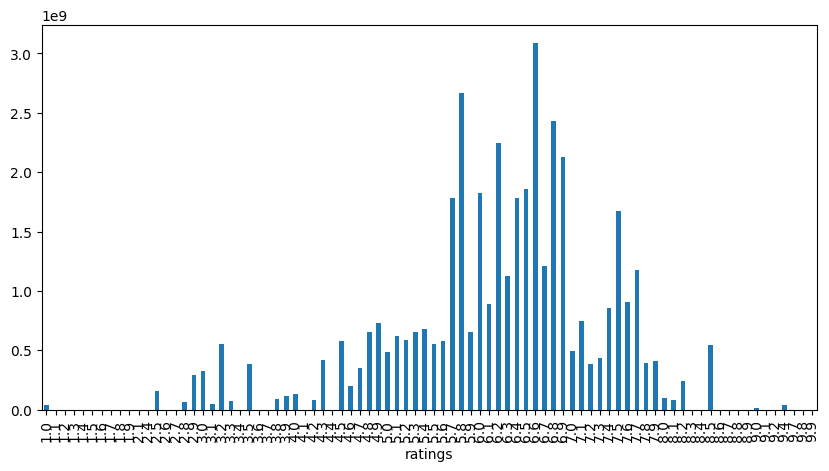

In [27]:
# создадим сводную таблицу зависимости рейтинга от бюджета фильма и построим график
data_gov_three = data_gov.pivot_table(index='ratings', values='budget', aggfunc='sum')
data_gov_three.plot(xlabel='ratings', kind='bar', figsize=(10,5), legend=False)

<AxesSubplot:xlabel='show_start_year'>

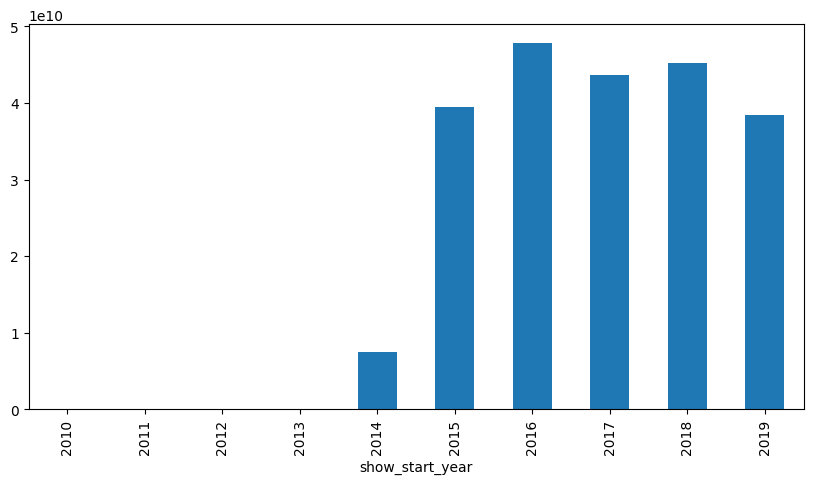

In [28]:
# создадим сводную таблицу зависимости года проката от кассовых сборов и построим график
data_gov_four = data_gov.pivot_table(index='show_start_year', values='box_office', aggfunc='sum')
data_gov_four.plot(xlabel='show_start_year', kind='bar', figsize=(10,5), legend=False)

##### Вывод 1
1. Зависимости между рейтингом и кассовыми сборами есть, фильмы с кассовыми сборами от 1 млрд. рублей чаще всего получают рейтинг от 4,7 до 7,6. А фильмы со сборами от 3 млрд. рублей чаще имеют рейтинг от 6,5 до 7,5.
2. Зависимости между годом проката и бюджетом есть, до 2015 года бюджет был не более 1 млрд. рублей в то время как с 2015 по 2018 включительно бюджет картин был уже не менее 6 млрд. рублей, а в 2019 году бюджет уже был свыше 10 млрд. рублей
3. Зависимости между рейтингом и бюджетом есть, при бюджете не менее 1 млрд. рублей рейтинг в диапазоне 5,7 - 7,7. При бюджете в 3 млрд. рублей рейтинг сужается от 5,8 до 6,6
4. Зависимости между годом проката и кассовыми сборами есть, так с 2015 по 2019 год наблюдаются кассовые сборы в размере не менее 6 млрд. рублей, а в 2017 году уже более 10 млрд. рублей, хотя в 2018 и в 2019 году наблюдается спад до уровня 8 млрд. рублей.

#### Вопрос 2
Как много фильмов которые провалились и удались в прокате? Как они распределены в зависимости от рейтинга и года проката. Какое соотношение фильмов которые удались и провалились?

4594

<AxesSubplot:xlabel='ratings'>

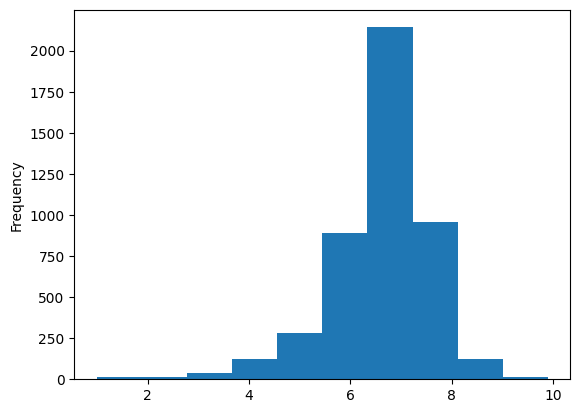

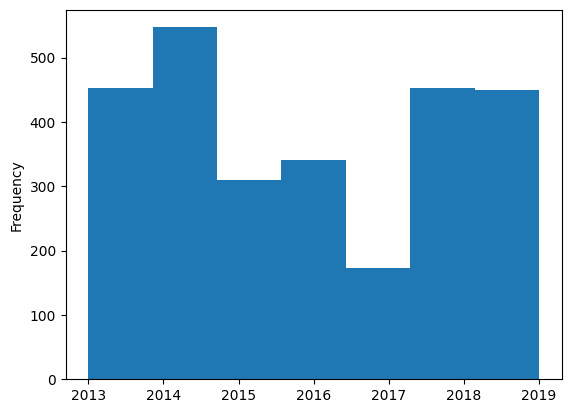

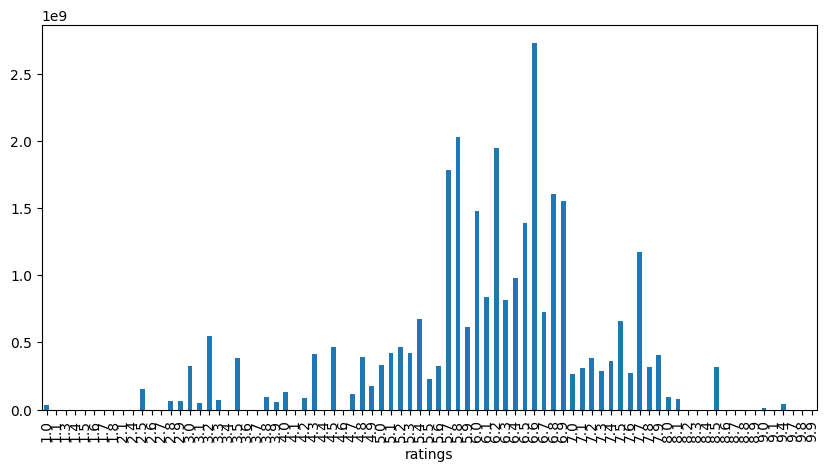

In [29]:
# создадим сводную таблицу с фильмами которые провалились в прокате
data_gov_fail = data_gov.query('box_office <= budget')
# выведем количество провалившихся фильмов на экран
display(len(data_gov_fail))
# построим график распределения рейтинга от количества неудавшихся картин
data_gov_fail.plot(y='ratings', kind='hist', bins=10, legend=False)
# построим график распределения неудавшихся картин в зависимости от года проката
data_gov_fail.plot(y='show_start_year', kind='hist', bins=7, range=(2013, 2019), legend=False)
# создадим сводную таблицу зависимости рейтинга от бюджета картины и построим график 
data_gov_fail_bud = data_gov_fail.pivot_table(index='ratings', values='budget', aggfunc='sum')
data_gov_fail_bud.plot(xlabel='ratings', kind='bar', figsize=(10,5), legend=False)

7230

<AxesSubplot:xlabel='ratings'>

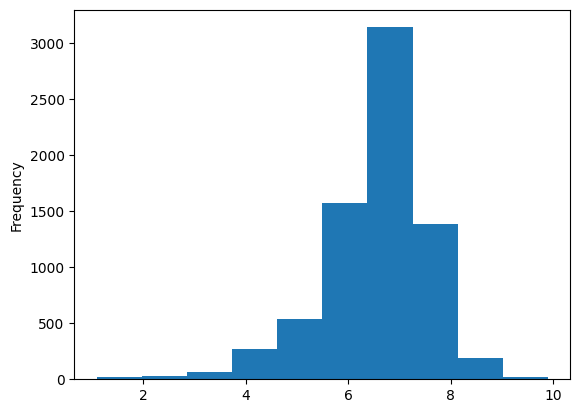

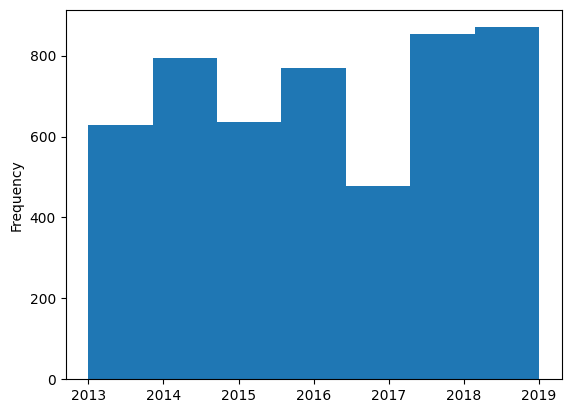

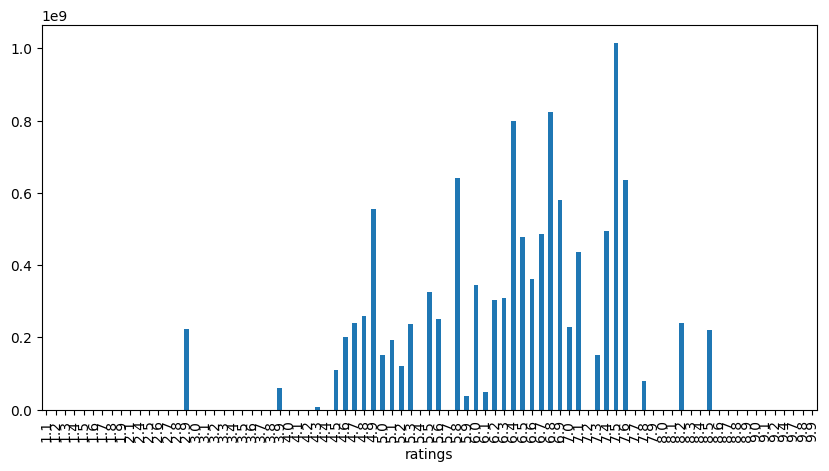

In [30]:
# создадим сводную таблицу с фильмами которые удались в прокате
data_gov_success = data_gov.query('box_office >= budget')
# выведем количество удавшихся фильмов на экран
display(len(data_gov_success))
# построим график распределения рейтинга от количества удавшихся картин
data_gov_success.plot(y='ratings', kind='hist', bins=10, legend=False)
# построим график распределения удавшихся картин в зависимости от года проката
data_gov_success.plot(y='show_start_year', kind='hist', bins=7, range=(2013, 2019), legend=False)
# создадим сводную таблицу зависимости рейтинга от бюджета картины и построим график 
data_gov_success_bud = data_gov_success.pivot_table(index='ratings', values='budget', aggfunc='sum')
data_gov_success_bud.plot(xlabel='ratings', kind='bar', figsize=(10,5), legend=False)

In [31]:
# рассчитаем соотношение провалившихся картин к удавшимся в прокате
round(len(data_gov_success) / len(data_gov_fail), 2)

1.57

##### Вывод 2
1. Провалились в прокате 239 картин, в то время как удалось всего 79. Соотношение удавшихся к провалившимся составляет 33%.
2. Провалившиеся фильмы чаще всего получали рейтинг от 6 до 7, и выходили в прокат в периоды 2015-2016 и 2018-2019 год.
3. Удавшиеся в прокате фильмы также получали чаще рейтинг от 6 до 7, реже 5, и почти равномерно распределены между 2015 и 2019 годом, с пиками в 2015 и 2018 году. 